# Module 6. Labs regression analysis

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 1: Relation between heart weight and body weight in Cats

### Part 1

Perform a linear regression analysis on the variables body weight (`Bwt`, dependent variable) and heart weight (`Hwt`, independent variabele).


1. Import the dataset `Cats.csv`.


In [7]:
cats = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv').set_index('ID')
# Show the first few records of the Data Frame
cats.head()

,Sex,Hwt,Bwt
ID,,,
1,F,2.0,7.0
2,F,2.0,7.4
3,F,2.0,9.5
4,F,2.1,7.2
5,F,2.1,7.3


2. Draw a scatter plot of both variables.


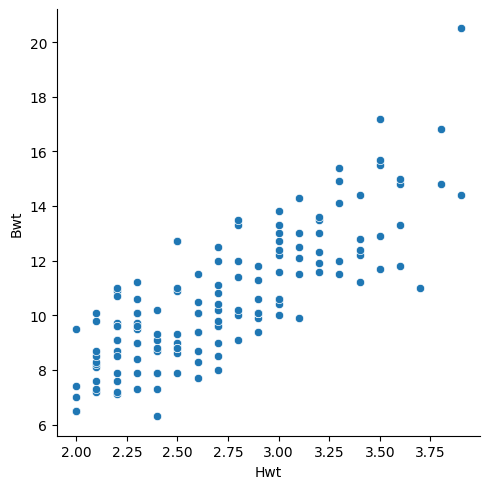

In [6]:
sns.relplot(data=cats, x='Hwt', y='Bwt')

3. Calculate and draw the regression line.


In [8]:
x = cats.Hwt.values.reshape(-1,1)
y = cats.Bwt

weight_model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

Regression line: ŷ = -0.35 + 4.03 x


<Axes: xlabel='Hwt', ylabel='Bwt'>

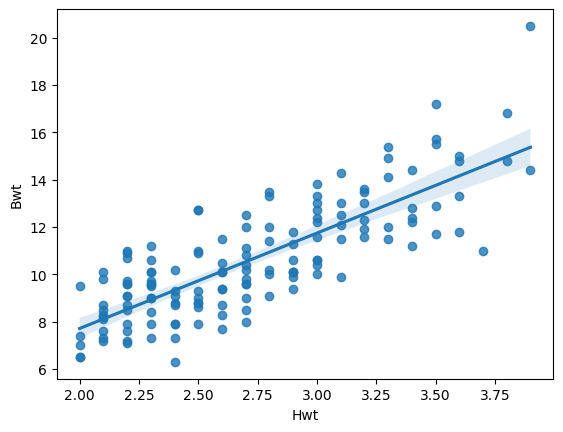

In [9]:
sns.regplot(x=cats.Hwt, y=cats.Bwt)

4. Calculate the correlation coefficient and the coefficient of determination.

In [11]:
cor = np.corrcoef(cats.Hwt, cats.Bwt)[0][1]
print(f"R = {cor}")
cor2 = cor ** 2
print(f"R^2 = {cor2}")

R = 0.804134787315513
R^2 = 0.6466327561709654


5. Interpret the results from the previous steps.

In [ ]:
# R^2 = 0,64 dus 64% van variantie observaties worden verklaart door regressielijn en het is sterk lineair verband
# R > 0 dus het is stijgend (je kan niet zeggen ahv hiervan of het sterk stijgend of dalend is)

### Part 2

1. Perform a linear regression analysis on the variables body weight (`Bwt`) and heart weight (`Hwt`), but this time **subdivided by gender** (`Sex`). Use the same dataset (`Cats.csv`).


In [ ]:
cats = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv')
# Show the first few records of the Data Frame
cats.head()

2. Draw a scatter plot of both variables for each gender.


<Axes: xlabel='Hwt', ylabel='Bwt'>

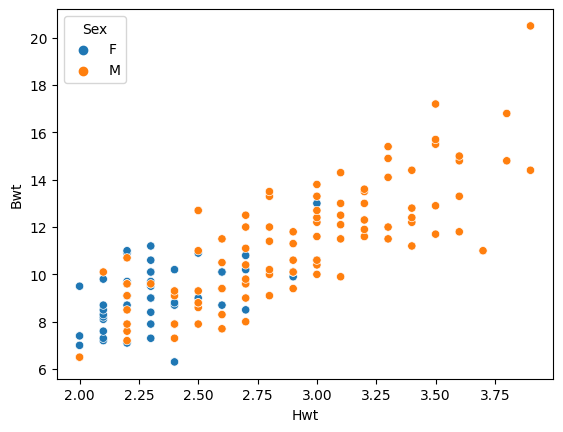

In [99]:
sns.scatterplot(data=cats, x='Hwt', y='Bwt', hue="Sex")

3. Calculate and draw the regression line.


In [16]:
#Male
x = cats.Hwt[cats.Sex == "M"].values.reshape(-1,1)
y = cats.Bwt[cats.Sex == "M"]

weight_model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {weight_model.intercept_:.3f} + {weight_model.coef_[0]:.3f} x")

#Female
x = cats.Hwt[cats.Sex == "F"].values.reshape(-1,1)
y = cats.Bwt[cats.Sex == "F"]

weight_model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {weight_model.intercept_:.3f} + {weight_model.coef_[0]:.3f} x")

Regression line: ŷ = -1.177 + 4.310 x
Regression line: ŷ = 2.981 + 2.636 x


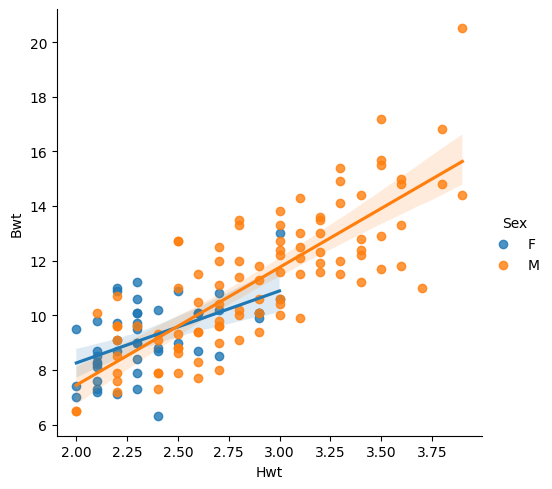

In [101]:
sns.lmplot(data=cats, x='Hwt' ,y='Bwt', hue='Sex');

4. Calculate the correlation coefficient and the coefficient of determination.


In [20]:
#Male
cor = np.corrcoef(cats.Hwt[cats.Sex == "M"], cats.Bwt[cats.Sex == "M"])[0][1]
print(f"R = {cor}")
cor2 = cor ** 2
print(f"R^2 = {cor2}")

#feMale
cor = np.corrcoef(cats.Hwt[cats.Sex == "F"], cats.Bwt[cats.Sex == "F"])[0][1]
print(f"R = {cor}")
cor2 = cor ** 2
print(f"R^2 = {cor2}")

R = 0.7930443171812304
R^2 = 0.628919289013444
R = 0.5320496665060397
R^2 = 0.28307684762918806


5. Interpret the results from the previous steps.

In [ ]:
# Bij male is R = 0,76 dus stijgend en R^2 = 0,62 dus sterk lineair verband
# Bij female is R = 0.53 dus stijgen en r^2 = 0,28 dus zwak lineair verband

### Answers

| Selection |  $\beta_0$ | $\beta_1$ |       $R$ |     $R^2$ |
| :-------- | ---------: | --------: | --------: | --------: |
| All       | -0.3510784 | 4.0317575 | 0.8041348 | 0.6466328 |
| Male      | -1.1768253 | 4.3098189 | 0.7930443 | 0.6289193 |
| Female    |  2.9813124 |  2.636414 | 0.5320497 | 0.2830768 |


## Exercise 2: Flemish agricultural and horticultural businesses

1. Use the dataset agriculture flanders.csv. The file contains data about agricultural and horticultural businesses in Flanders

Source: Departement Landbouw en Visserij op basis van StatBel

In [27]:
farms = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/agriculture%20flanders.csv', delimiter = ";",decimal=",")
# Show the first few records of the Data Frame
farms.head()

,year,number_of_farms,average_area_per_farm_(ha)
0,1980,75706,8.38
1,1981,73292,8.58
2,1982,71255,8.79
3,1983,69807,8.94
4,1984,68083,9.15


2. What are the datatypes for each of the columns.

In [28]:
farms.dtypes

year                            int64
number_of_farms                 int64
average_area_per_farm_(ha)    float64
dtype: object

3. Change the datatype of 'average_area_per_farm_(ha)' to float.

In [ ]:
# is al gedaan door bij read_csv decimal="," toe te voegen

4. Draw a scatter plot of the number of farms versus the year.


<Axes: xlabel='year', ylabel='number_of_farms'>

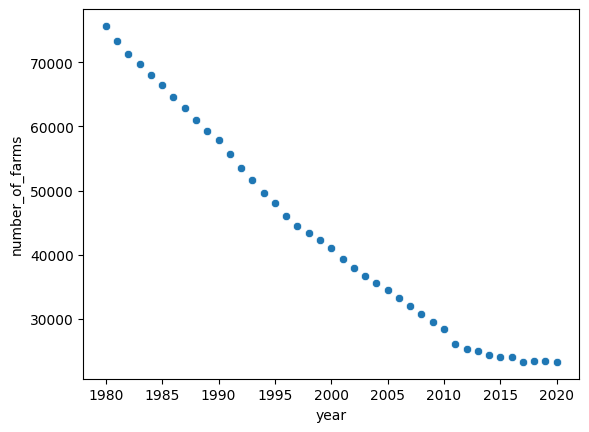

In [29]:
sns.scatterplot(data=farms, x='year', y='number_of_farms')

5. Is there a positive / negative relationship between year and number_of_farms?

R = -0.9861066349492859

In [30]:
cor = np.corrcoef(farms.year, farms.number_of_farms)[0][1]
print(f"R = {cor}")
cor2 = cor ** 2
print(f"R^2 = {cor2}")
# R < 0 dus dalend regressielijn en r^2 = 97% dus uitzonderlijk sterk lineair verband

R = -0.9861066349492859
R^2 = 0.9724062954910041


6. Is there a strong relationship between year and 'number_of_farms'?

R² = 0.9724062954910041

In [ ]:
# zie boven

R² = 0.9724062954910041


7. Draw a scatter plot of the 'average_area_per_farm_(ha)' versus the year.

<Axes: xlabel='year', ylabel='average_area_per_farm_(ha)'>

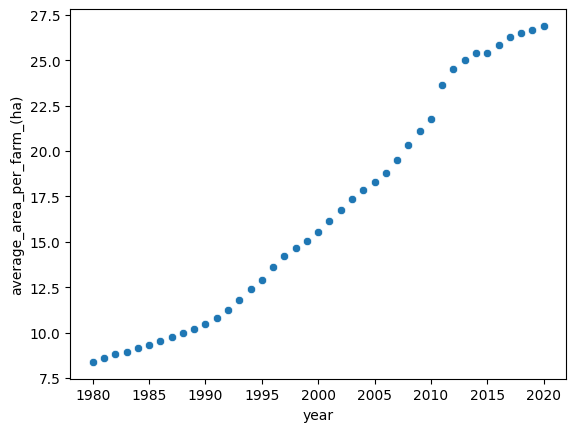

In [31]:
sns.scatterplot(data=farms, x='year', y='average_area_per_farm_(ha)')

8. What will be the 'average_area_per_farm_(ha)' in 2035?

Average area in 2035 = 34.91987804878045

In [35]:
x = farms['year'].values.reshape(-1,1)
y = farms['average_area_per_farm_(ha)']

weight_model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

weight_model.predict([[2035]])

Regression line: ŷ = -1031.90 + 0.52 x


array([34.91987805])

8. Calculate the total agricultural area for each year.   
Calculate for each year the change of the total area relative to 1980.  
Make a plot.

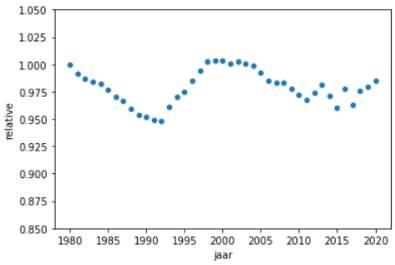


In [73]:
farms['totaal'] = farms['number_of_farms'] * farms['average_area_per_farm_(ha)']
aantal = farms[farms.year == 1980].totaal.values
farms['relative'] = (farms['totaal'] / aantal)
print (farms)

    year  number_of_farms  average_area_per_farm_(ha)     totaal  relative
0   1980            75706                        8.38  634416.28  1.000000
1   1981            73292                        8.58  628845.36  0.991219
2   1982            71255                        8.79  626331.45  0.987256
3   1983            69807                        8.94  624074.58  0.983699
4   1984            68083                        9.15  622959.45  0.981941
5   1985            66408                        9.33  619586.64  0.976625
6   1986            64624                        9.53  615866.72  0.970761
7   1987            62814                        9.76  613064.64  0.966344
8   1988            60983                        9.98  608610.34  0.959323
9   1989            59365                       10.19  604929.35  0.953521
10  1990            57811                       10.45  604124.95  0.952253
11  1991            55719                       10.81  602322.39  0.949412
12  1992            53569

<Axes: xlabel='year', ylabel='relative'>

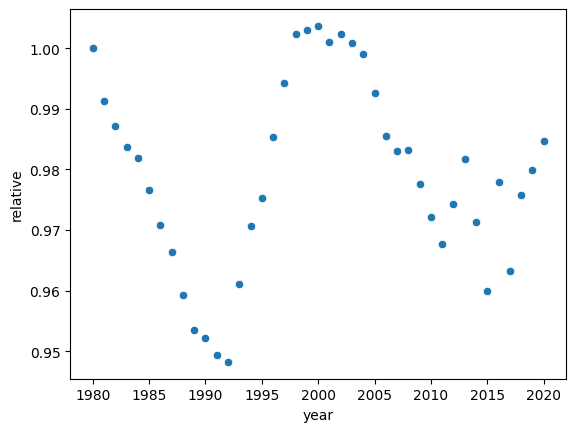

In [74]:
sns.scatterplot(data=farms, x='year', y='relative')

## Exercise 3: Movies of 2006 and 2007

1. The file Movies_2006_2007 contains information on over 200
movies that were released during 2006 and 2007.

In [2]:
movies = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Movies_2006_2007.csv', delimiter = ";", encoding='cp1252')
# Show the first few records of the Data Frame
movies.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,$22 707 121,$32 109 139,$39 517 763,$11 000 000,$15 909 367,$16 000 000
1,2.0,Year of the Dog,Paramount Vantage,Drama,$141 803,$318 598,$1 540 141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,$12 839 402,NaN,$22 466 994,$18 200 000,$27 040 983,$25 000 000
3,4.0,Stomp the Yard,Sony Pictures,Drama,$28 263 594,$42 853 277,$61 356 221,$15 000 000,$33 166 898,$14 000 000
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,$39 868 642,$44 407 533,$38 189 217,$16 500 000


2. Use cols_with_dollars to transform the amounts in dollars into floats.
For ease of use, change the values into 'million dollar' - values.  
E.g. $22 707 121	becomes 22.707121.  


In [3]:
cols_with_dollars = ['7-day Gross',	'14-day Gross',	'Total US Gross',	'International Gross',	'US DVD Sales',	'Budget']

In [4]:
for col in cols_with_dollars:
    movies[col] = movies[col].str.replace('$','')
    movies[col] = movies[col].str.replace(' ','')
    movies[col] = movies[col].astype(float) 
    movies[col] = movies[col] / 1000000
movies.head()

C:\Users\Quinten De Wolf\AppData\Local\Temp\ipykernel_23964\943290208.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies[col] = movies[col].str.replace('$','')


,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,22.707121,32.109139,39.517763,11.000000,15.909367,16.0
1,2.0,Year of the Dog,Paramount Vantage,Drama,0.141803,0.318598,1.540141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,12.839402,NaN,22.466994,18.200000,27.040983,25.0
3,4.0,Stomp the Yard,Sony Pictures,Drama,28.263594,42.853277,61.356221,15.000000,33.166898,14.0
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,39.868642,44.407533,38.189217,16.5


3. Create two scatterplots: one of Total US Gross (Y) versus
7-day Gross (X) and one of Total US Gross (Y)
versus 14-day Gross (X).

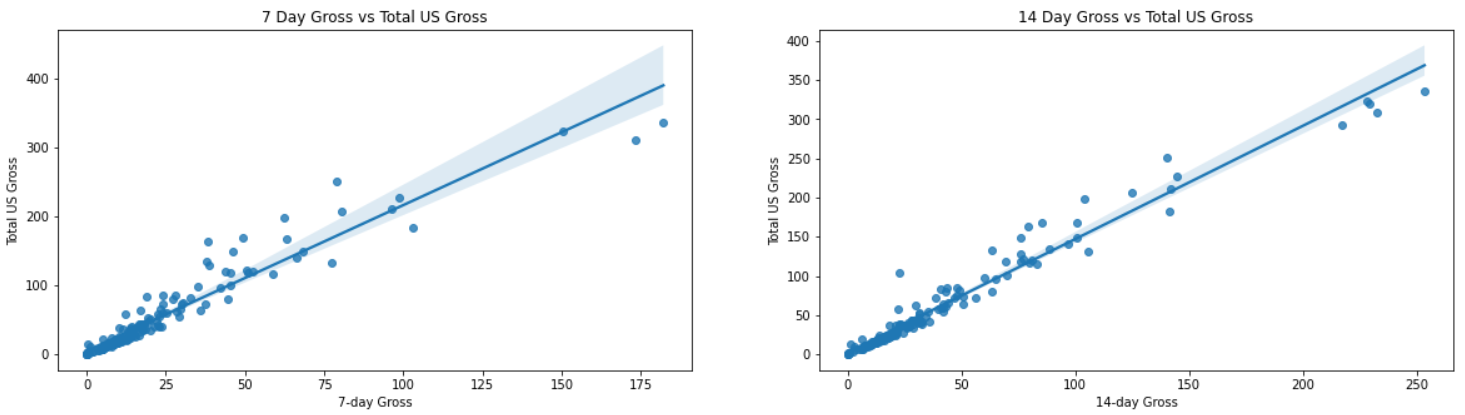

<Axes: xlabel='7-day Gross', ylabel='Total US Gross'>

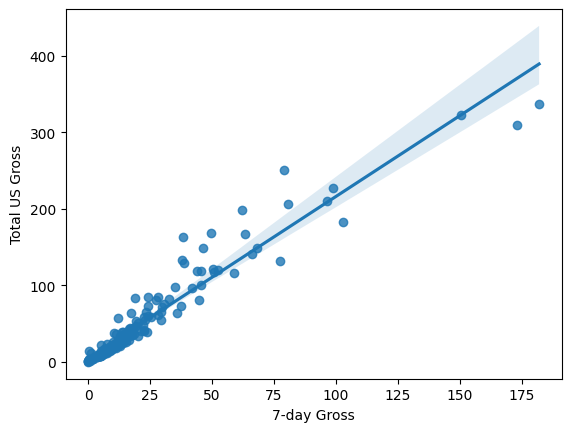

In [5]:
sns.regplot(data=movies, x='7-day Gross', y='Total US Gross')

<Axes: xlabel='14-day Gross', ylabel='Total US Gross'>

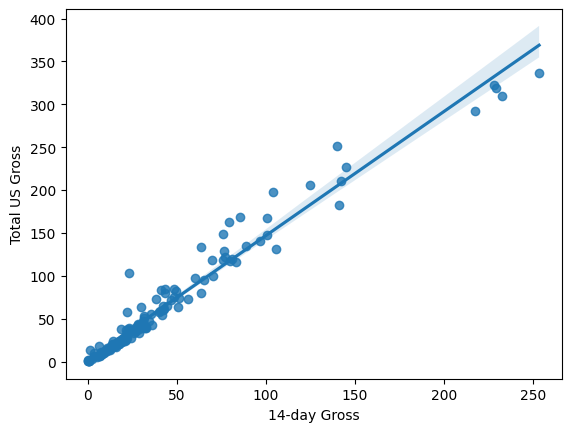

In [6]:
sns.regplot(data=movies, x='14-day Gross', y='Total US Gross')

4. What are the corresponding
values for $R$ and $R^2$?

R (7 Day Gross vs Total US Gross) = 0.959407544414305  
R² (7 Day Gross vs Total US Gross) = 0.9204628362790865  
R (14 Day Gross vs Total US Gross) = 0.9813238689021966  
R² (14) Day Gross vs Total US Gross) = 0.9629965356771755

In [7]:
import numpy.ma as ma
cor = ma.corrcoef(ma.masked_invalid(movies['7-day Gross']),ma.masked_invalid( movies['Total US Gross']))[0][1]
print(f"R = {cor}")
cor2 = cor ** 2
print(f"R^2 = {cor2}")
import numpy.ma as ma
cor = ma.corrcoef(ma.masked_invalid(movies['14-day Gross']),ma.masked_invalid( movies['Total US Gross']))[0][1]
print(f"R = {cor}")
cor2 = cor ** 2
print(f"R^2 = {cor2}")


R = 0.9594075444143061
R^2 = 0.9204628362790888
R = 0.981323868902197
R^2 = 0.9629965356771764


5. What are the equations of the linear regression lines in the previous part?  
What exactly does intercept and slope tell you about the movie business?

7 days gross: ŷ = 4.590921233818129 + 2.113464756610182 * x  
14 days gross: ŷ = 2.44900289255105 + 1.4464530702590803 * x

In [10]:


movies7 = movies[['7-day Gross', 'Total US Gross']].dropna() #dropna gaat als null in ofwel ene ofwel andere of beide die row wegdoen 
x = movies7['7-day Gross'].values.reshape(-1,1)
y = movies7['Total US Gross']

weight_model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

Regression line: ŷ = 4.59 + 2.11 x


6. In the previous scatterplots you can see some ouliers at the right side. These are movies that did great
during their first week or two. 
* 6.1 Make a boxplot to visualize the outliers for the first week or two.

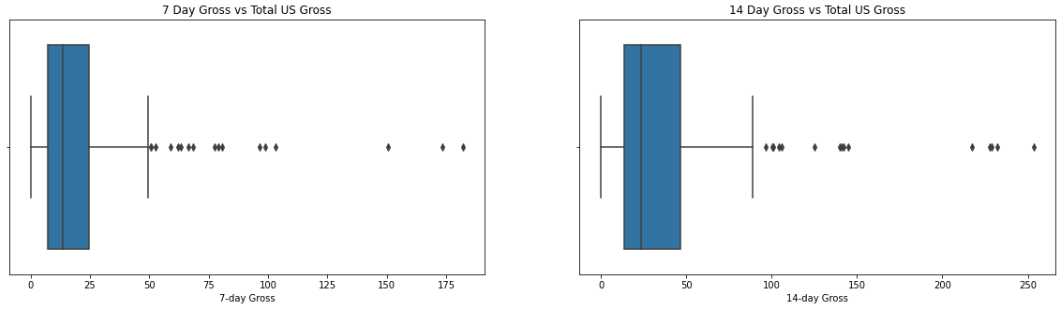

* 6.2 Calculate the upper limit values for the first week or two.

limit_7_days_gross is 50.376637875  
limit_14_days_gross is 96.2906745

* 6.3 What are the outliers for the first week or two?

A few movies for the first week: 

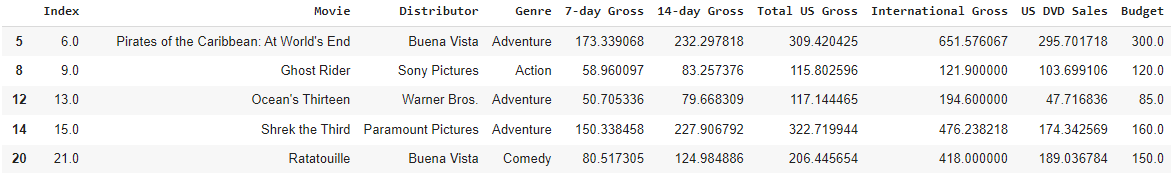

* 6.4 Remove the outliers out of the dataset.

* 6.5 Give the new values for $R$ and $R^2$.


R (7 Day Gross vs Total US Gross)= 0.9324792650689281  
R² (7 Day Gross vs Total US Gross) = 0.8695175797834882

R (14 Day Gross vs Total US Gross)= 0.9584258717658031  
R² (14) Day Gross vs Total US Gross) = 0.9185801516700396

* 6.6 Give the new values for the slope and the intercept of the regression lines. Do the outliers have a great effect?


7 days gross: ŷ = -5.073945979380596 + 2.7456809688135646 * x  
14 days gross: ŷ = -3.227354951096885 + 1.6529869503645318 * x

## Exercise 4
The file production.csv contains the production cost per unit produced. That is, producing the 100th unit costs 82 EUR and producing the 600th unit costs 34 EUR.  
(a) Make the following plot  

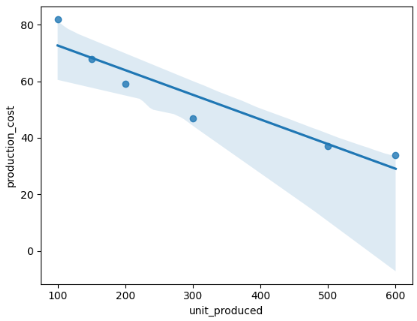

(b) Based on this plot  
(b.1) Can you decide whether the relationship between the number of units produced and the production cost is positive / negative.   
(b.2) Can you decide whether the relationship between number of units produced and production costis weak / strong.  
(b.3) Can you decide whether $R$ will be between [-1,-0.5] / [-0.5, 0] / [0, 0.5] / [0.5,1].  
(c) What is the production cost for the 400th unit?  
(d) How much loss will the company incur if not a single unit is produced?  
(e) How much does it cost in total to produce 1000 units  


Some answers  
(c) the 400th unit costs 46.5051  
(d) loss when no unit produced 81.392  
(e) total cost for 1000 units 37739.8969

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/production.csv', delimiter=";")
df.head(20)

,unit_produced,production_cost
0,100,82
1,150,68
2,200,59
3,300,47
4,500,37
5,600,34
